# Data Science Programming Project Using Open Government Datasets

This dataset includes all business properties liable to non-individuals. The dataset includes information 
such as property address, description, ratable value, liable party, empty property information and rate relief.
I chose this dataset because it provides detailed information about various commercial properties, including their values,
types, and usage. Analyzing this data will help me understand the trends in property values, what are the different
property types and how locations affect these values, and the impact of reliefs and vacancy rates on the properties.
This insight is valuable for property market analysis and decision-making. 

In [83]:
import pandas as pd

df=pd.read_csv(r'C:\Users\Tanvi\Downloads\2024-07-01_BusinessRates.csv',encoding='latin1')
print(df)


            Property Ref                  Account Holder 1  \
0     Ref:10034695731467              CHUNKS STEAK BOX LTD   
1     Ref:1003708165442A              ROYAL MAIL GROUP PLC   
2     Ref:10037099153853                        VALUME LTD   
3     Ref:10055590642185                        ARQIVA LTD   
4     Ref:10055593003732                   PGC ESTATES LTD   
...                  ...                               ...   
6206  Ref:60613290026132        THE NORTHERN CARE ALLIANCE   
6207  Ref:60613290042576   THE PENNINE CARE NHS FOUNDATION   
6208  Ref:60613290264596           ENERGETICS ELECTRIC LTD   
6209  Ref:60757490040037  ROCHDALE BOROUGHWIDE HOUSING LTD   
6210  Ref:60764590020097    ENERGETICS ELECTRICITY LIMITED   

          Account Holder 2                   Property Name 1  \
0                      NaN            DALE AUTO PARTS UNIT 1   
1                      NaN                    PROGRESS HOUSE   
2                      NaN             C C G WINDSCREENS LTD   

''''' Columns :
***** Property Data *****
Property Ref: A unique number to identify each property.
Account Holder 1: The main person or the company responsible for paying the rates.
Account Holder 2: A second person or the company responsible for the property (if any).
Property Name 1: main name of the property (e.g., building or shop name).
Property Name 2: Its an extra name for the property (if it has one).
Property Address 1-4: Parts of the property’s full address,which is divided into sections.
Property Post Code: postal code for the property location.

***** Liability and Financial Data *****
Liable From: Date when the property became responsible for paying business rates.
RV (Rateable Value): This is the property’s yearly rental value, which is used to calculate how much tax it owes.
Description: A short description of what the property is used for (example - shop or warehouse).

***** Whether property is Empty or Vacant *****
Empty Y/N: Tells if the property is vacant or it is not vacant.
Empty From: If it’s empty, this is the date from when the property became vacant.

***** Relief or Discount *****
Discretionary Relief %: Its is a discount decided by the local council.
Mandatory Relief %: Its is a discount required by law .
Small Business Rate Relief Y/N: It Shows whether the property gets a discount for being a small business.
Supporting Small Business Relief Y/N: Any extra help for small businesses moving out of small business rate relief.
Retail Hospitality and Leisure Relief Y/N: Its a discount for businesses like shops, restaurants or hotels.'''

# By taking a look at the above information , below are the goals that I need to achieve using this dataframe

# Goal 1 ---> Analyze Business Properties: Understand the trends in property usage, values, and types.

# Goal 2 ---> Check Rate Relief: See how the rate relief is distributed and its what is its impact

# Goal 3 ---> Find Empty Properties: Analyze which properties are vacant and their patterns

# Goal 4 ---> Property Value Insights: Understand the relationship between property values and location/type of the properties

In [84]:
print(df.info()) # returns the count of Non-null values 
print('*************************** Total Null Value Count *************************************')
print(df.isnull().sum())  # returns the total count of NULL values present in the dataframe

# Filling Null Values with appropriate data . using fillna()
df['Account Holder 2'].fillna('Unknown',inplace=True) #inplace=True means the dataframe will be modified directly . 
df['Property Name 1'].fillna('Unknown',inplace=True) #inplace = False will return modified copy,leaving original copy untouched 
df['Property Name 2'].fillna('Unknown',inplace=True)
df['Property Address 3'].fillna('Unknown',inplace=True)
df['Property Address 4'].fillna('Unknown',inplace=True)
df['Empty From'].fillna(pd.NaT,inplace=True)

# Recheck for NULL values

print(df.isnull().sum())
# Even though i replace datetime values with NaT it is still showing me the same count for isnull()
# This happens because NaT is considered a form of null in pandas. Even after replacing missing values with NaT, 
# pandas still counts them as missing values when you use isnull(). 
# This behavior is expected and normal.

print(df['Empty From']) #NUll data gets replaced with NaT




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Property Ref                               6211 non-null   object
 1   Account Holder 1                           6211 non-null   object
 2   Account Holder 2                           754 non-null    object
 3   Property Name 1                            3384 non-null   object
 4   Property Name 2                            1076 non-null   object
 5   Property Address 1                         6211 non-null   object
 6   Property Address 2                         6211 non-null   object
 7   Property Address 3                         5659 non-null   object
 8   Property Address 4                         2476 non-null   object
 9   Property Post Code                         6211 non-null   object
 10  Liable From                         

In [85]:
duplicates=df[df.duplicated(keep=False)]  

#df.duplicated() checks for duplicate rows, but it only shows a boolean result (True or False) for each row,
#and by default, pandas only displays the first and last five rows in the output.SO to view all rows we did 
#df[df.duplicated(keep=False)]. If keep='false', it only marks duplicates after the first occurrence as True. 

print(duplicates)

# We got an empty dataframe in the result means there are no duplicates . 

Empty DataFrame
Columns: [Property Ref, Account Holder 1, Account Holder 2, Property Name 1, Property Name 2, Property Address 1, Property Address 2, Property Address 3, Property Address 4, Property Post Code, Liable From, RV, Description, Empty Y/N, Empty From, Discretionary Relief %, Mandatory Relief %, Small Business Rate Relief Y/N, Supporting Small Business Relief Y/N, Retail Hospitality and Leisure Relief Y/N]
Index: []


In [86]:
print(df.info())
print(df['Liable From'].unique()) #to ensure if the column has only date values
print(df['Small Business Rate Relief Y/N'].unique())  #to ensure if the column has only Y/N values


# In the result for the above , it is observed that the column Liable From and Empty From should have datetime as their datatype
# But they have been assigned the datatype as Object. To make these columns easier to analyze I will convert them into the 
# appropriate datatype (datetime). By using pd.to_datetime()
df['Liable From'] = pd.to_datetime(df['Liable From'], errors='coerce')
df['Empty From'] = pd.to_datetime(df['Empty From'], errors='coerce')
# By using errors='coerce' , the invalid / NA values will get replaced by NaT(Not a Time similar to NaN)
# without this it would throw error for invalid values.

# For the columns Empty Y/N,Small Business Rate Relief Y/N , Supporting Small Business Relief Y/N and  
# Retail Hospitality and Leisure Relief Y/N we won't convert the datatype of the column to boolean instead we will just map
# the textual Y and N as True and False respectively. SO the datatype for these columns will remain as Object only. 

df['Empty Y/N'] = df['Empty Y/N'].map({'Y': True, 'N': False})
df['Small Business Rate Relief Y/N'] = df['Small Business Rate Relief Y/N'].map({'Y': True, 'N': False})
df['Supporting Small Business Relief Y/N'] = df['Supporting Small Business Relief Y/N'].map({'Y': True, 'N': False})
df['Retail Hospitality and Leisure Relief Y/N'] = df['Retail Hospitality and Leisure Relief Y/N'].map({'Y': True, 'N': False})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Property Ref                               6211 non-null   object
 1   Account Holder 1                           6211 non-null   object
 2   Account Holder 2                           6211 non-null   object
 3   Property Name 1                            6211 non-null   object
 4   Property Name 2                            6211 non-null   object
 5   Property Address 1                         6211 non-null   object
 6   Property Address 2                         6211 non-null   object
 7   Property Address 3                         6211 non-null   object
 8   Property Address 4                         6211 non-null   object
 9   Property Post Code                         6211 non-null   object
 10  Liable From                         

C:\Users\Tanvi\anaconda3\envs\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31.08.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tanvi\anaconda3\envs\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31.05.2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tanvi\anaconda3\envs\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30.08.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Tanvi\anaconda3\envs\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.04.2016' in DD/MM/YYYY format. Prov

In [87]:
#Analyze RV (Rateable Value) to identify ranges, average, and potential outliers

average_RV=df['RV'].mean() #calculates the average of all numeric values in the column
#For a Pandas Series (single column)--> average of all the values in that column. Returns a single number
#For a Pandas DataFrame (multiple columns)--> average of each column. Returns a Pandas series of means of each column. 
#If applied row-wise (axis=1), it calculates the mean across rows.
#If applied column-wise (axis=0), it calculates the mean of each column

minimum_RV=df['RV'].nsmallest() # return the smallest N values from the column. By default 5 values.

maximum_RV=df['RV'].nlargest() # return the top N largest values, not just the single maximum value . By default 5 values.

print('average_RV = ',average_RV) 
print('minimum_RV = ',minimum_RV)
print('maximum_RV = ',maximum_RV)

# In the output below for minimum_RV value 0 is the smallest value and 58,668,3221 are the index where this value was found
# Similarly for maximum_RV 5770000 , 3660000 are the largest values while 611 , 497 are thier indexes. 

average_RV =  29507.139108034135
minimum_RV =  58      0
668     0
3221    0
3224    0
3239    0
Name: RV, dtype: int64
maximum_RV =  611     5770000
497     3660000
5472    2430000
5188    2280000
5067    1890000
Name: RV, dtype: int64


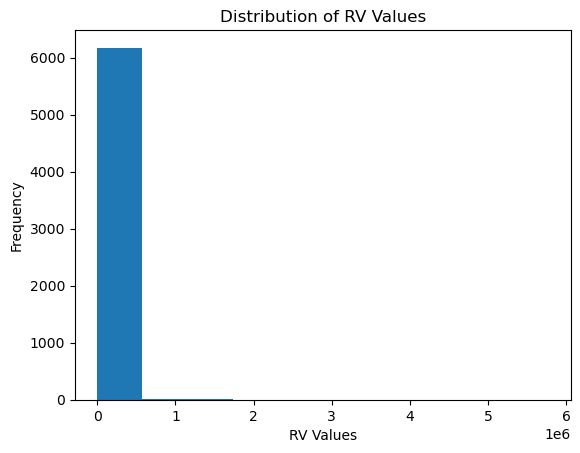

Bin Edges: [      0.          961666.66666667 1923333.33333333 2885000.
 3846666.66666667 4808333.33333333 5770000.        ]


In [88]:
# Step 1: Analyze the distribution of RV values
# I can use a histogram or box plot to visualize how RV values are distributed.
# Question: Are most of the RV values clustered around a specific range or are they spread out?

#PLotting a histogram for the RV values
import matplotlib.pyplot as plt
plt.hist(df['RV'])
plt.xlabel('RV Values')  #X-axis: The bins (ranges of RV values)
plt.ylabel('Frequency')  #Y-axis: The frequency (count of values within each bin)
plt.title('Distribution of RV Values')
plt.show()

# In the below output Matplotlib divided the data into default bins and the bar positions represent those bin labels
# or midpoints.Adjusting the bin size will create a more detailed histogram showing the spread of values across the entire range.

import numpy as np

counts, bin_edges = np.histogram(df['RV'], bins=6) #np.histogram() calculates the number of values in each bin (total 6 bins) for the RV colum
# counts Contains the number of RV values in each bin ie. frequency
# bin_edges Contains the boundaries (start and end values) of each bin
# Example:
# If bin_edges = [0, 1000, 2000,3000, ..., 10000], then the 
#  First bin covers values from 0 to 1000.
#  Second bin covers values from 1000 to 2000, and so on.

print("Bin Edges:", bin_edges)

# In the histogram below there is clustering around the range 0 to 961,666 in the first bin (bin 0). This suggests that most
# properties have a relatively low RV value compared to the overall range of the RV. There might be a Long tail distribution in
# this case because it is observed that most of the small values are clustered towards the left and a very few values are far
# large and are stretched towards the right forming a tail. We can say that this data is Right skewed



C:\Users\Tanvi\anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RV'>

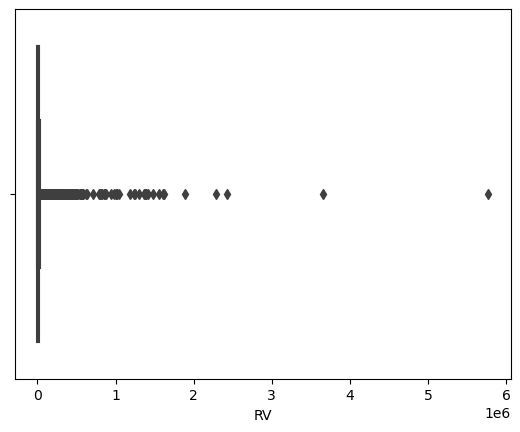

In [89]:
sns.boxplot(df['RV'])  # Plotting a box plot for the right skewed data . 
# Since the data doesn't seem uniform its hard to make any obervations for the Histogram and the box plots. 

In [90]:
# Confirming Skewness for the above data 
# Skewness is the asymmetry of the data distribution . Positive skew: Long tail on the right (right-skewed).
# Negative skew: Long tail on the left (left-skewed).
# Zero skew: Data is symmetric.

# The Data above is has a right skewed distribution  (most values are small and a  few are very large).
# This can be checked using some statistical methods and visualizations.


# Case 1: By using Descirptive statistics , If we look at the mean and median values of the data and if mean > median then we 
#         can say that the data is right skewed.
print('average_RV = ',average_RV) 
median_RV=df['RV'].median()
print('median_RV = ',median_RV)
# The mean value is significantly greater than the median value . This tells that RV data is right skewed. 


# Case 2: Pandas or SciPy provides a skewess function . A postive value indicates that the data is right skewed. 
# and negative value will tell that it is left skewed data
skewness=df['RV'].skew(axis=0,skipna=True) #skew() method works on numeric columns and ignores NaN values by default.
# axis=1 for row and axis=0 for column
# The value of skipna is False if we want to include the NaN values as well                                          
print('Skewness for RV = ',skewness)
# The skewness value retured by the skew() method came out to be positive which indicates that the data is right skewed. 



average_RV =  29507.139108034135
median_RV =  6000.0
Skewness for RV =  20.01516193613179


Number of Zeros :  28
The total number of bins are: 10
Bin edges for the transformed data
[ 0.          1.55681828  3.11363656  4.67045484  6.22727312  7.78409141
  9.34090969 10.89772797 12.45454625 14.01136453 15.56818281]
Skewness of Transformed data is -0.26784457167986575


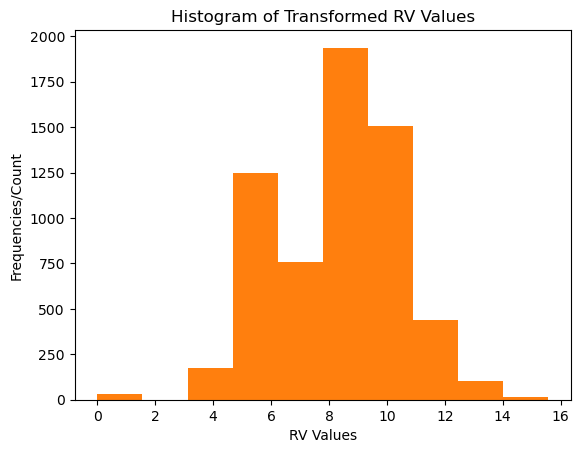

In [91]:
# Step 2
# Since the data is highly skewed (Positively/Negative), I consider applying a transformation to it to reduce its skewness. 
# The RV data seems to be higly skewed.

# Transformation is a way to modify values in the data to make it easier to analyze or fit into models. 
#           1. Done to reduce skewness and make data look more normal
#           2. Handle outliers and stabilize variance(Variance tells how far each datapoint in the dataset is from its mean)
# Types of Transformations:
#   1. Log Transformation:
#        * Reduces large values more than small values.
#        * Use it for data with a right skew.
#        * Example: Convert x into log(x + 1).
#   2. Square Root Transformation:
#        * Makes moderate adjustments to reduce skewness.
#        * Example: Convert x into sqrt(x).
#   3. Box-Cox Transformation:
#        * Automatically chooses the best way to reduce skewness.
#        * Works only for positive values.

# For a data which is  positively skewed, log transformation is often the best choice because it reduces the impact of large 
# values and helps normalize the data.NumPy's np.log() function is used to apply log transformation . 
# But, before applying I need to  ensure all values in the data are positive, as logarithms cannot handle zero or negative values.
# If my data contains zeros, I will consider adding a small constant (1) to all values before transformation.

# Checking if my RV data contains zeros
print('Number of Zeros : ',sum(df['RV']<=0)) # this will return True / False depending on the value 


# Adding 1 to handle zeros in the data
transformed_data=np.log(df['RV']+1)


# Plotting a histogram for the log transformed RV values 
plt.hist(transformed_data)
plt.xlabel('RV Values')
plt.ylabel('Frequencies/Count')
plt.title('Histogram of Transformed RV Values')

# To know the exact number of bins used , unpack the values returned by the plt.hist() function. 
# This function returns three values : counts , bins and patches
# Where counts = frequency/ no. of data points , bins = total no. of bins and patches = graphical bars used to plot histogram
counts,bins,patches = plt.hist(transformed_data)


print(f'The total number of bins are: {len(bins)-1}') 
# This will print the number of bins used in the histogram. 
# The bins array contains the edges of each bin, so the total number of bins is the length of bins minus 

counts,bin_edges=np.histogram(transformed_data,bins=10)
print('Bin edges for the transformed data')
print(bin_edges)

# By observing the below histogram , the transformed_data seems to be more normally distributed than the original skewed data.
# Checking whether the skewness of the transformed data is close to zero
print(f'Skewness of Transformed data is {transformed_data.skew()}')




C:\Users\Tanvi\anaconda3\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RV'>

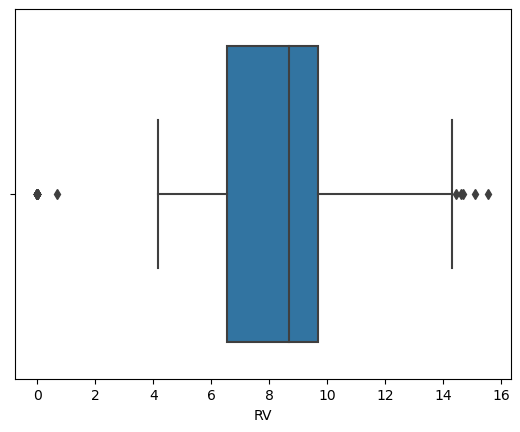

In [92]:
import seaborn as sns
sns.boxplot(transformed_data)

# The box represents the interquartile range (IQR) where the middle 50% of the data lies.
# The whiskers extend from the box to the highest and lowest values within 1.5 times the IQR from the box.
# Outliers are points that fall outside the whiskers, usually marked with small dots

In [93]:
# Step 3
# In step three, we are calculating the mean, median, and variance of the transformed data to understand its central tendency
# (where the data tends to center) and spread (how much the data varies). This will help to know if the transformation has made the
# data more stable or easier to analyze.
# Comparing the variance before and after transformation will help to see if the transformation reduced extreme values or
# made the data less spread out.

# calculating the mean, median, and variance of the transformed RV values
print(f'Mean of transformed_data is: {transformed_data.mean()}')
print(f'Median of transformed_data is: {transformed_data.median()}')
print(f'Variance of transformed_data is: {transformed_data.var()}')

# To check whether the transformation has reduced variance, compare the variance of the original data 
print('Variance of Original data is: ',df['RV'].var())

# The transformed data has a smaller variance, it indicates the transformation has reduced the spread of the data

Mean of transformed_data is: 8.314819558346812
Median of transformed_data is: 8.699681400989514
Variance of transformed_data is: 4.54329095038587
Variance of Original data is:  18735306880.381638


Analyzing Relationships : Look into how the transformed RV values relate to other variables in the dataset (e.g., property types, relief percentages, etc.).

RV                                           1.000000
Empty Y/N                                   -0.044590
Discretionary Relief %                      -0.011722
Mandatory Relief %                           0.024125
Small Business Rate Relief Y/N              -0.095544
Supporting Small Business Relief Y/N        -0.016954
Retail Hospitality and Leisure Relief Y/N   -0.004392
Name: RV, dtype: float64


Text(0, 0.5, 'Discretionary Relief %')

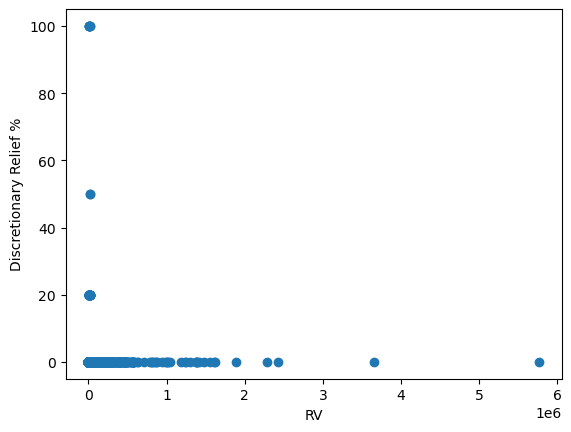

In [94]:
# Analyzing the relationships between the transformed RV values and other variables in the dataset by the following approach:

# 1. Correlation Analysis: by checking the correlation between RV and other numeric variables in the dataset.
#    Using .corr() method in pandas to calculate the Pearson correlation coefficient.
# The Pearson correlation coefficient measures the strength and direction of the linear relationship between two numerical variables.
#   Range: From -1 to +1.
#   +1: Strong positive correlation (as one increases, the other increases).
#   -1: Strong negative correlation (as one increases, the other decreases).
#    0: No correlation.

correlation_matrix=df.corr()
print(correlation_matrix['RV'])
# The correlation column below shows how strongly each column is related to the RV column :
# 1.000000 for RV: RV column is perfectly correlated with itself.
# Negative values (e.g., -0.044590): Slight negative relationship; as RV increases, these variables slightly decrease.
# Positive values (e.g., 0.024125): Slight positive relationship; as RV increases, these variables slightly increase.



# 2. Using Scatter Plots : To visually understand the relationship between RV and other continuous variables.
#    This will show you how RV changes with respect to the relief percentage
plt.scatter(df['RV'],df['Discretionary Relief %'])
plt.xlabel('RV')
plt.ylabel('Discretionary Relief %')
# In the below scatter plot, a straight line along the X axis means there is no strong co-relation between the variables. 
# The clustering of points near the line tells that changes in the RV variable do not predict the changes in Discretionary Relief %.
# This indicates a weak or no relationship

# In Conclusion, the correlation values are very close to zero for all relief columns,this indicates that there is almost no
# linear relationship between RV and relief percentages.
# The data points in the scatter plot are scattered without a clear pattern. 
# Relief % don't significantly depend on the RV values. 

In [95]:
# 3. Group by Categorical Variables Like Description Type and compare the RV values for each group.
# The Discription column provides a short description of what the property is used for (e.g., shop, office, warehouse)
group_by_property_types=df.groupby('Description')['RV'].mean()
print(group_by_property_types)

# Which property type has the highest and lowest RV values 
RV_min=group_by_property_types.min()  # min() max() will return the Highest and lowest value
RV_max=group_by_property_types.max()
print('RV_min = ',RV_min) 
print('RV_max = ',RV_max)
print('Property type with minimum RV: ',group_by_property_types.idxmin())  #idxmin() and idxmax() return the index(property types)
print('Property type with minimum RV: ',group_by_property_types.idxmax())

# Knowing what is the range of RV values across property types
RV_range = RV_max - RV_min
print("Range of RV values across property types:", RV_range)


Description
ACTIVITY CENTRE,CAMP SITE AND PREMISES     9300.0
AD RIGHT                                    500.0
ADSHEL                                      500.0
ADVERTISING BANNER AND PREMISES             700.0
ADVERTISING RIGHT                           622.0
                                           ...   
Workshop, Offices and Premises            17250.0
YOUTH CENTRE & PREMISES                   14000.0
YOUTH CENTRE AND PREMISES                  6275.0
YOUTH CLUB & PREMISES                      6600.0
YOUTH CLUB AND PREMISES                    6300.0
Name: RV, Length: 346, dtype: float64
RV_min =  0.0
RV_max =  1595000.0
Property type with minimum RV:  AWAITING DEMOLITION
Property type with minimum RV:  WIND FARM AND PREMISES
Range of RV values across property types: 1595000.0


Description
WIND FARM AND PREMISES                       1595000.0
SUPERSTORE AND PREMISES                      1408000.0
MOTORWAY SERVICE AREA                        1390000.0
CAR SUPERMARKET AND PREMISES                 1380000.0
COLD STORE AND PREMISES                      1159250.0
                                               ...    
BUILDING UNDERGOING RECONSTRUCTION                 0.0
PREMISES UNDER RE-DEVELOPMENT TO DOMESTIC          0.0
Premises beyong economic repair                    0.0
Property in disrepair                              0.0
PROPERTY BEYOND ECONOMIC REPAIR                    0.0
Name: RV, Length: 346, dtype: float64


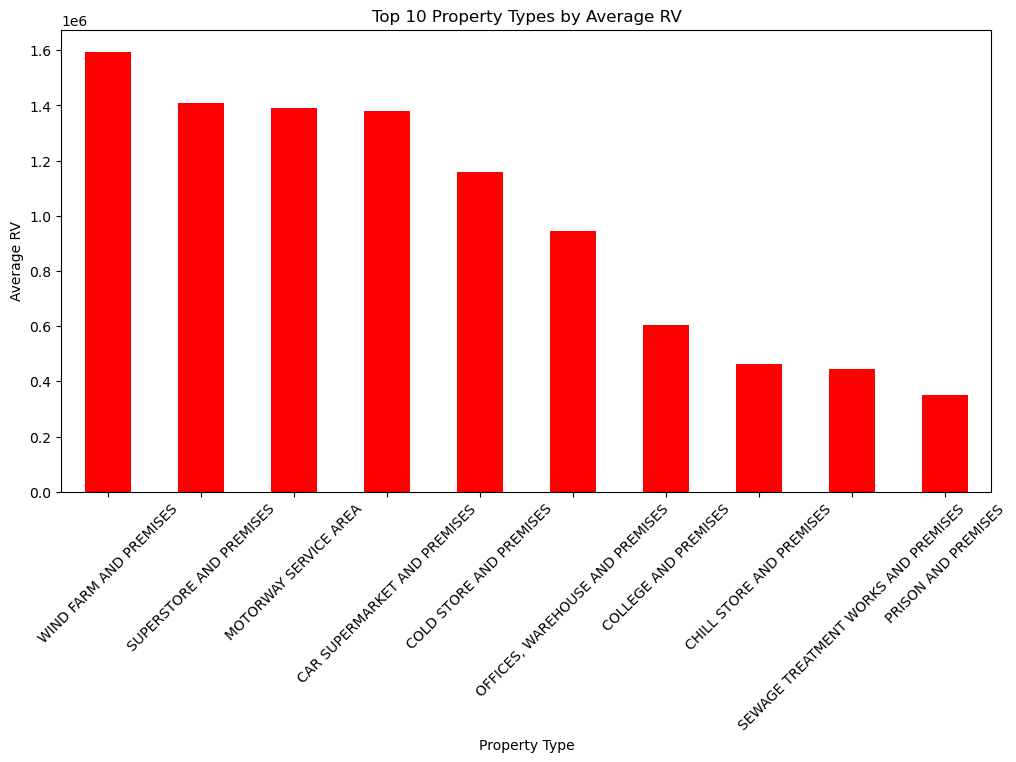

In [96]:
# Finding Common property types with similar RV values Or whether any property types consistently have higher or lower RV values
# To analyze whether there are property types with very similar RV values or if certain property types consistently have higher
# or lower RV values we can check if any property types have very close or equal average RV values by visualizing it using a 
# bar plot or a box plot. This will helps us look for clusters of similar RV values. We can Identify Trends by finding 
# whether any property types appear to have systematically higher or lower RV values or Sorting the grouped values will help
# highlightwhich property types have higher or lower averages

# Sorting property types by their average RV values
sorted_property_types = group_by_property_types.sort_values(ascending=False) # Sorting the property types based on RV mean
print(sorted_property_types)

# Plotting the sorted data .Since there is a large number of peroperty types, to simplify the analysis,we focus on the 
# top property types that contribute the most to RV values
top_property_types = sorted_property_types.head(10)  # Adjust number of top types
top_property_types.plot(kind='bar', color='red', figsize=(12, 6))
plt.title('Top 10 Property Types by Average RV')
plt.xlabel('Property Type')
plt.ylabel('Average RV')
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability
plt.show()


# In the below bar plot , WIND FARM AND PREMISES has the highest average RV,followed by SUPERSTORE AND PREMISES and 
# MOTORWAY SERVICE AREA.These property types have much higher RVs compared to others, which shows that they are the major 
# contributors. 

********************************Sorted rv_range values***********************************
                                        min      max    range
Description                                                  
warehouse and premises                    0  5770000  5770000
cold store and premises               38500  2280000  2241500
offices and premises                    380  1620000  1619620
factory and premises                   1250   880000   878750
sewage treatment works and premises   75000   815000   740000
...                                     ...      ...      ...
indoor golf centre and premises      224000   224000        0
indoor play centre and premises      108000   108000        0
kennels & catteries                    6000     6000        0
kick pitch and premises                1275     1275        0
youth club and premises                6300     6300        0

[318 rows x 3 columns]
*******************************Standard deviation for each property type********

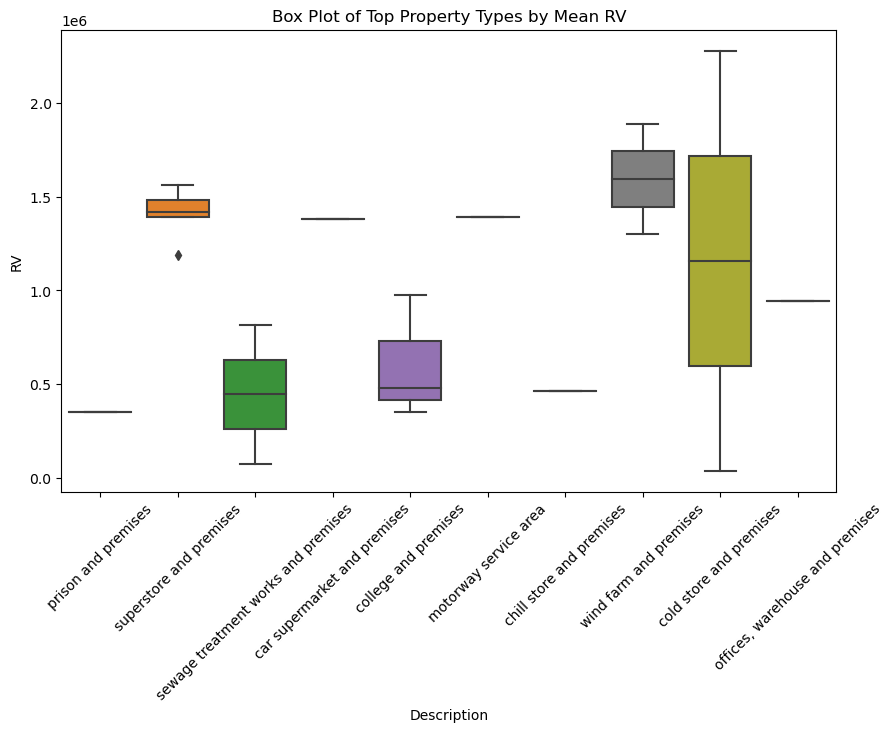

In [97]:
# Variability Across Types:
# Are the RV values widely spread, or do they cluster around a specific range?
# To answer this question, we need to:
#   Calculate the Range: Find the difference between the highest and lowest RV values for each property type.
#   Measure Spread: Use standard deviation or variance to see how much RV values vary within each type.
#   Use a Box Plot: This will visually show how RV values are spread out for each property type and highlight any patterns.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe 'df' is already loaded

# Removing leading/trailing spaces and converting to lowercase for consistent comparisons
df['Description'] = df['Description'].str.strip().str.lower()
# This step was done because the top_properties dataset result came
# out to be as empty.Due to this I was encountering ValueError: min() arg is an empty sequence in the 
# step sns.boxplot(x='Description', y='RV', data=top_properties) . An empty top_properties dataset indicates that the 
# top_properties values used to filter the Df don't match any Description entries. SO to check this I first printed the 
# Property_types (top_properties) to ensure that the values I am filtering by actually exist in Description column.
# Then I removed the extra spaces and different cases so that the values exactly match with each other. 
# But still  there were some hidden characters or slight mismatches in the data and the same error occured so to check if there
# is any mismatch between the top_properties and the actual values in the Description I did the following steps
# matching_values = df['Description'].isin(top_properties)
# print(df[matching_values]['Description'])
# This check started showing the correct rows . Then I stored this data as filtered_property= df[matching_values]

# Calculate the range of RV values for each property type
rv_range = df.groupby('Description')['RV'].agg(['min', 'max'])#groups the data by property type and focuses on the RV column
# and .agg(['min', 'max']) calculates the minimum and maximum RV values for each property
rv_range['range'] = rv_range['max'] - rv_range['min']# A new column range will show difference between the max and min values.
print('********************************Sorted rv_range values***********************************')
print(rv_range.sort_values(by='range', ascending=False)) #sorts the property types by their range in descending order
#this will display the types with the widest spread at the top.
# Calculating the standard deviation for each property type
RV_std = df.groupby('Description')['RV'].std()
print('*******************************Standard deviation for each property type********************************')
print(RV_std.sort_values(ascending=False))
print()

# which property types have the highest or lowest RV values compared to others . This can be identified by sorting the mean 
# and median values for each property type
RV_stats = df.groupby('Description')['RV'].agg(['mean', 'median'])
print('********************************Sorted RV_stats values: *******************************************')
print(RV_stats.sort_values(by='mean', ascending=False))
# Using a Boxplot for spread visualization
# In the box plot we can focus on the top property values to simplify the analysis 
# First I will have to calculate a separate mean RV for each property type
mean_RV_by_property = df.groupby('Description')['RV'].mean()

# Selecting the top 10 property types by mean RV
top_properties = mean_RV_by_property.nlargest(10).index # this will select the top 10 property types with highest RV values and 
# .index will return the names of the property types
print('*****************************************Printing Top Properties**************************************')
print(top_properties)
print()

# Filtering the dataset for the top 10 property types
matching_values = df['Description'].isin(top_properties)
filtered_property = df[matching_values]
print('*************************************Filtered Property Results***************************************')
print(filtered_property.head(5))
print(filtered_property.shape)
# This lines check whether each value in the Description column of the dataframe df matches one of the top property types stored
# in top_properties .
# The isin() method of pandas is used to check this , it will match the rows based on multiple values. DataFrame.isin(values).
# Returns True/False values. 

# Creating a Box Plot for the top property types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Description', y='RV', data=filtered_property)
plt.xticks(rotation=45)
plt.title('Box Plot of Top Property Types by Mean RV')
plt.show()

# Observation of Box Plot :
# The plot shows the spread of RV values for each property type and the middle line inside each box is the median value of RV 
# for each property type.
# 1. In a box plot,the height of the box plot shows the IQR(Inter Quartile Range Q3-Q1) where all the RV values lie.
#    So, a larger box indicates more spread in the Property types. This can be seen in the Cold Store and Premises Property Type 
#    means that this property type has more variability in RV values.
# 2. Any points outside the whiskers which are the lines extending outside the box, are the outliers . The Superstore and 
#    Premises Property Type has an outlier which shows that there are extreme RV values in it that are different from most 
#    others .
# 3. The position of the median tells if the data is skewed. If it is closer to the bottom that means the data has a right-skew, 
#    and if its closer to the top it means it has a left-skew . Superstore and Premises Property Type and the Car Supermarket and
#    Premises Property Type have right skewed data. 


*********************************Vacant Properties****************************************
            Property Ref                  Account Holder 1 Account Holder 2  \
4     Ref:10055593003732                   PGC ESTATES LTD          Unknown   
23    Ref:10109597754519  TRUSTEES OF THE GUARDIAN PENSION           SCHEME   
25    Ref:10115000010086     ASPDEN & MIDDLETON PROPERTIES              LTD   
37    Ref:10274200050077                      ROCHDALE MBC          Unknown   
38    Ref:10274200060045                      ROCHDALE MBC          Unknown   
...                  ...                               ...              ...   
6167  Ref:60178193756153          WARMCO SPACE HEATING LTD          Unknown   
6168  Ref:60178X00020052          WARMCO SPACE HEATING LTD          Unknown   
6170  Ref:60220400100057  ROCHDALE BOROUGHWIDE HOUSING LTD          Unknown   
6197  Ref:60481X90030033             MAYER FAMILY PROPERTY          Unknown   
6198  Ref:60481X90040044             MAY

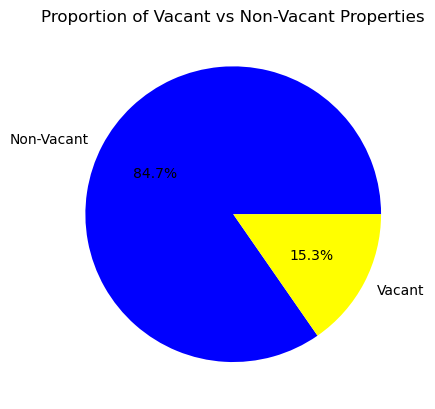

In [98]:
# My last goal is to analyze vacant properties and their patterns. 
# To identify properties which are marked as vacant, filter vacant properties based on the column Empty Y/N
vacant=df[df['Empty Y/N']==True]  # In earlier steps we had mapped Y as True and N as False . This step filters vacant properties.  
print("*********************************Vacant Properties****************************************")
print(vacant)

#count how many vacant and non vacant  properties are there in total
vacant_count = df['Empty Y/N'].value_counts() # value_counts() method in pandas will give the frequency/count of vacant and 
#non vacant properties in the dataframe column Empty Y/N.

print('*************************vacant_count***************************************')
print(vacant_count)

# Converting the vacant_count into a list for the pie chart . 
vacant_count_list=vacant_count.tolist() 

#After finding the total number of vacant properties, I visualize it using a pie chart 
plt.pie(vacant_count_list, labels=['Non-Vacant', 'Vacant'],autopct='%1.1f%%',colors=['blue', 'yellow'])
# autopct='%1.1f%%' will add the percentage labels to the pie chart 
plt.title('Proportion of Vacant vs Non-Vacant Properties')
plt.show()

# Observation of Pie Chart : The pie chart shows that 84.7% of properties are Non-Vacant,while only 15.3% are Vacant,
# indicating that the majority of properties are in use.

Summary of my Analysis :
    1. At the time of RV distribution,The original RV values were highly right-skewed, 
       with most values being small and a few very large ones . Using log transformation reduced the skweness and made the data
       more normally distributed
    2. While finding out the variability across the property types, some property types like Superstore and Premises and Cold 
       Store and  Premises showed high variability in RV values as they had a larger IQR in the box plots. Also,outliers were
       observed in a few property indicating extreme RV values.
    3. The correlation analysis between RV and Relief percentage showed a weak relationship.
    4. The pie chart of Proportion of Vacant vs Non Vacant Properties concluded that majority of the properties are in use .
      


****************************************** Conclusion of the entire Analysis ********************************************
1. A wide range of property types have been analyzed and its observed that certain property types, such as 
Wind Farm AND Premises and SUPERSTORE AND PREMISES  have significantly higher RV values, while others properties  like
Properties in Disrepair and PROPERTY BEYOND ECONOMIC REPAIR  have lower or zero RV values

2. Finding out the skewness of the RV data and then transforming of the RV data by applying log transformation method helped 
in reducing skewness and brought more uniformity to the data, making the data easier to analyze.

3. While checking the correlation between RV and other numeric variables in the dataset, I  observed that rate reliefs like
Mandatory Relief and Small Business Rate Relief have a relatively low correlation with the RV values and their correlation
was weak. This indicates that the reliefs do not significantly affect the property values across the property types.

4. The properties which have higher mean RV values tend to be large, commercial, or specialized properties like 
WIND FARM AND PREMISES,SUPERSTORE AND PREMISES and MOTORWAY SERVICE AREA .  On the other hand, properties marked for
reconstruction or beyond repair like BUILDING UNDERGOING RECONSTRUCTION and PROPERTY BEYOND ECONOMIC REPAIR have zero or
low RV values.


5. There are only 15.3% of the vacant properties, suggesting that the vast majority of properties are occupied. This indicates a low vacancy rate in the area.

So overall this analysis showed that commercial properties are in high demand while a very few are vacant.Also,the study of reliefs and property usage highlighted the areas where policies could be improved to support the struggling property types. 